In [1]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
dir_path = "/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset/Raw_Recordings"

In [3]:
ms_ = np.load(dir_path + "/ms.npy", allow_pickle= True)
mr_ = np.load(dir_path + "/mr.npy", allow_pickle= True)
as_ = np.load(dir_path + "/as.npy", allow_pickle= True)
ar_ = np.load(dir_path + "/ar.npy", allow_pickle= True)

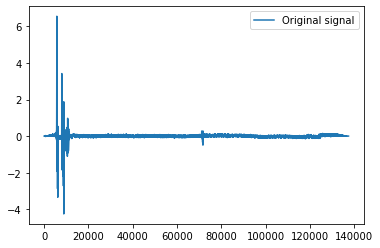

In [4]:
plt.plot(ms_[0][0])
plt.legend(['Original signal'])

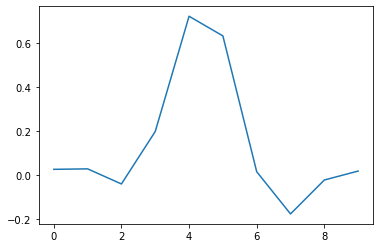

In [5]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(ms_[0][0], w, level=6)

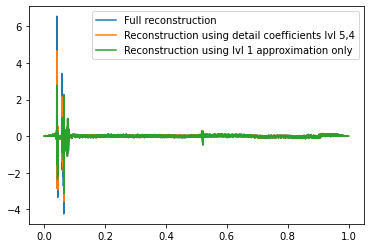

In [6]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

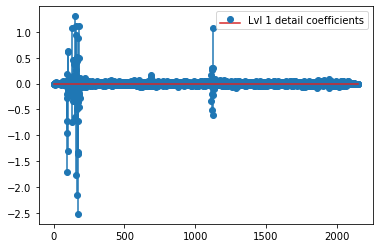

In [7]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])


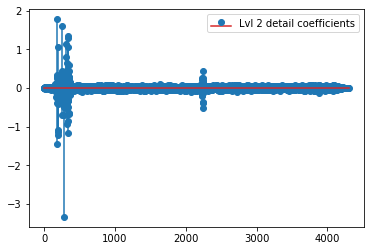

In [8]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


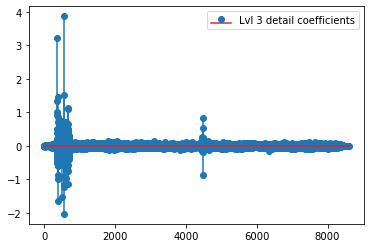

In [9]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


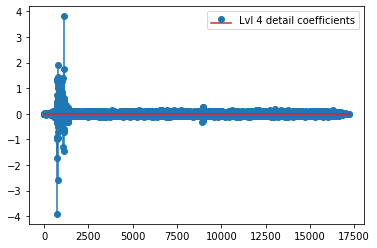

In [10]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


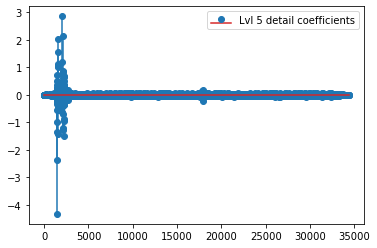

In [11]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


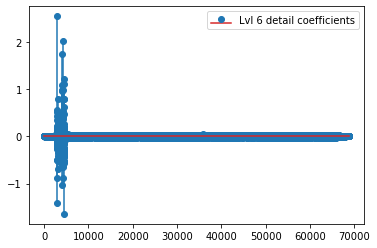

In [12]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [13]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, ms_[0][0].stats.npts), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
x_without_lvl1approx = ms_[0][0] - approx_lvl1_interp

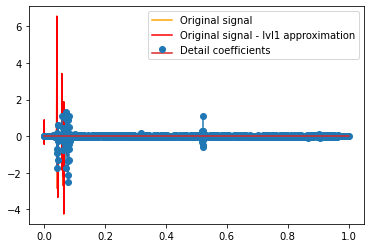

In [14]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(ms_[0][0], color='orange')
reconstruction_plot(x_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

In [15]:
coef_ms_x, coef_ms_y, coef_ms_z = [], [], []
for i in range(len(ms_)):
    coef_ms_x.append(pywt.wavedec(ms_[i][0], w, level=6))
    coef_ms_y.append(pywt.wavedec(ms_[i][1], w, level=6))
    coef_ms_z.append(pywt.wavedec(ms_[i][2], w, level=6))

In [16]:
coef_mr_x, coef_mr_y, coef_mr_z = [], [], []
for i in range(len(mr_)):
    coef_mr_x.append(pywt.wavedec(mr_[i][0], w, level=6))
    coef_mr_y.append(pywt.wavedec(mr_[i][1], w, level=6))
    coef_mr_z.append(pywt.wavedec(mr_[i][2], w, level=6))

In [17]:
coef_as_x, coef_as_y, coef_as_z = [], [], []
for i in range(len(as_)):
    coef_as_x.append(pywt.wavedec(as_[i][0], w, level=6))
    coef_as_y.append(pywt.wavedec(as_[i][1], w, level=6))
    coef_as_z.append(pywt.wavedec(as_[i][2], w, level=6))

In [18]:
coef_ar_x, coef_ar_y, coef_ar_z = [], [], []
for i in range(len(ar_)):
    coef_ar_x.append(pywt.wavedec(ar_[i][0], w, level=6))
    coef_ar_y.append(pywt.wavedec(ar_[i][1], w, level=6))
    coef_ar_z.append(pywt.wavedec(ar_[i][2], w, level=6))

In [19]:
coef_ms_x = np.array(coef_ms_x)
coef_mr_x = np.array(coef_mr_x)
coef_as_x = np.array(coef_as_x)
coef_ar_x = np.array(coef_ar_x)


/var/folders/gd/3d6ckpdn4q30skhxnvs_p7b80000gn/T/ipykernel_16539/1256609456.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coef_ms_x = np.array(coef_ms_x)
/var/folders/gd/3d6ckpdn4q30skhxnvs_p7b80000gn/T/ipykernel_16539/1256609456.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coef_mr_x = np.array(coef_mr_x)
/var/folders/gd/3d6ckpdn4q30skhxnvs_p7b80000gn/T/ipykernel_16539/1256609456.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths 

In [20]:
coef_ms_x[0].shape

(7,)

In [21]:
for i in range(len(ms_)):
    print(coef_ms_x[i][0].shape)

(2154,)
(2301,)
(1816,)


In [22]:
for i in range(len(mr_)):
    print(coef_mr_x[i][0].shape)

(1959,)
(2396,)
(2154,)
(1915,)
(2083,)
(1937,)
(2400,)
(1859,)
(1682,)
(1832,)
(1895,)
(1967,)
(2031,)


In [23]:
for i in range(len(as_)):
    print(coef_as_x[i][0].shape)

(1820,)
(1489,)
(1356,)
(1460,)
(1271,)
(1235,)
(1348,)
(1388,)
(1246,)
(1278,)
(4806,)
(2475,)
(2455,)
(2429,)
(2399,)
(2405,)


In [24]:
for i in range(len(ar_)):
    print(coef_ar_x[i][0].shape)

(2496,)
(1917,)
(2167,)
(2112,)
(1910,)


In [25]:
from scipy.stats import mannwhitneyu